In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('TaxiData.csv')

# print(df['trip_seconds'].isna().sum())
df['trip_seconds'] = df['trip_seconds'].fillna(0)

# df.sort_values(by='trip_miles').tail(10)

### 2.a Trip Frequency by Time of Day, Month, and Day

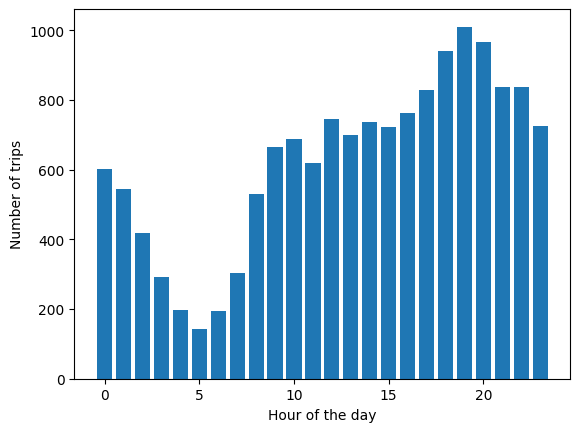

In [66]:
df_start_hour = df['trip_start_hour']
hour_freq = df_start_hour.value_counts()
plt.bar(hour_freq.index, hour_freq)
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
# plt.savefig('2a_1.png')
plt.show()
plt.close()

This plot shows the trip distribution for the hours of the day.
The maximum trip frequency is during hours 18-21, with a peak at hour 19. The minimum trip frequency is during hour 5.   

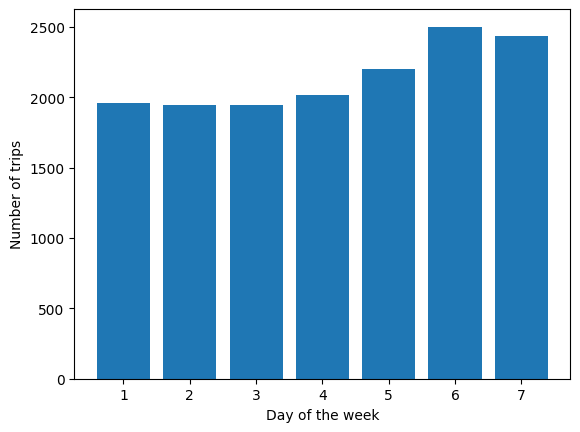

In [67]:
df_start_day = df['trip_start_day']
day_freq = df_start_day.value_counts()
plt.bar(day_freq.index, day_freq)
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
# plt.savefig('2a_2.png')
plt.show()
plt.close()

This plot shows the trip distribution for the days of a week.
The maximum trip frequency is on day 6. The minimum trip frequency is on day 3.

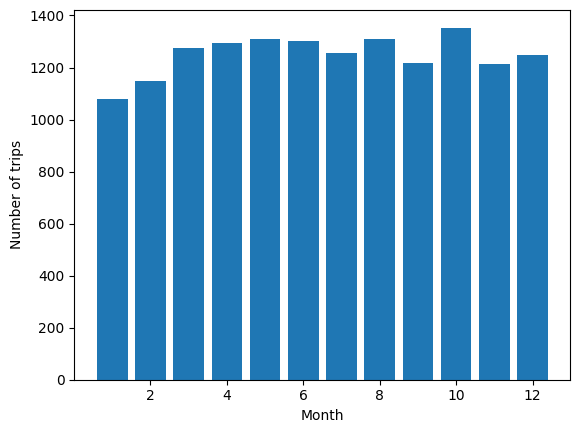

In [68]:
df_start_month = df['trip_start_month']
month_freq = df_start_month.value_counts()
plt.bar(month_freq.index, month_freq)
plt.xlabel('Month')
plt.ylabel('Number of trips')
# plt.savefig('2a_3.png')
plt.show()
plt.close()

This plot shows the trip distribution vs month.
THe highest trip frequency is in October, while the minimum frequency is in January.

#### Relavence of Patterns
Based on the variation in demand, taxi services can allocate more or less resources for a given day and time.

### 2.b Peak Hours and Distance Analysis

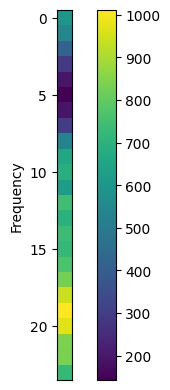

In [69]:
plt.imshow(hour_freq.sort_index().values.reshape(-1, 1), cmap='viridis')
plt.xticks([])
plt.colorbar()
plt.ylabel('Frequency')
# plt.savefig('2b_1.png')
plt.show()
plt.close()

The heatmap shows the distribution of trip frequencies across different hours of the day.

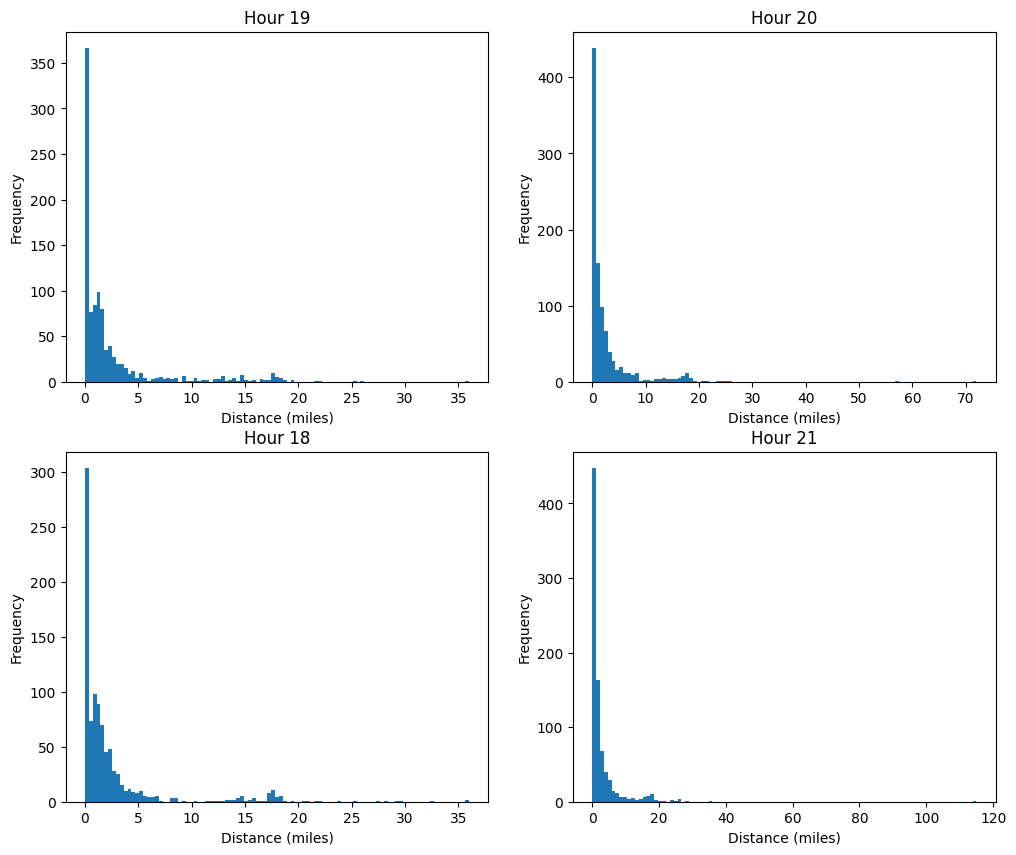

In [70]:
# peak hours : 19, 20, 18, 21
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.title('Hour 19')
df_dist_19 = df.query('trip_start_hour == 19')['trip_miles']
bins = np.linspace(df_dist_19.min(), df_dist_19.max(), 100)
plt.hist(df_dist_19.values, bins)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.title('Hour 20')
df_dist_20 = df.query('trip_start_hour == 20')['trip_miles']
bins = np.linspace(df_dist_20.min(), df_dist_20.max(), 100)
plt.hist(df_dist_20.values, bins)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.title('Hour 18')
df_dist_18 = df.query('trip_start_hour == 18')['trip_miles']
bins = np.linspace(df_dist_18.min(), df_dist_18.max(), 100)
plt.hist(df_dist_18.values, bins)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.title('Hour 21')
df_dist_21 = df.query('trip_start_hour == 21')['trip_miles']
bins = np.linspace(df_dist_21.min(), df_dist_21.max(), 100)
plt.hist(df_dist_21.values, bins)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# plt.savefig('2b_2.png')
plt.show()
plt.close()

**Histogram of Trip Distances during Peak Hours (18-21):**
- The histograms show the distribution of trip distances during the peak hours of 18, 19, 20, and 21.
- The trip distances are largely short, with most of them being below 20 miles. There are a few outliers with large distances.

#### Interpretation
During peak hours, there is a large traffic leading to more congestion on the roads. This leads to longer wait times.

### 2.c Trip Duration and Distance Distribution

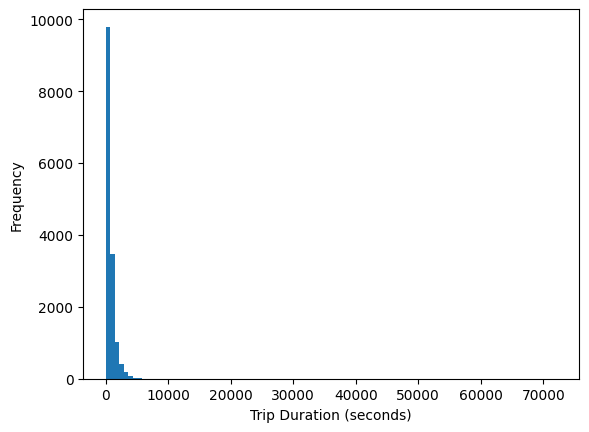

In [71]:
df_times = df['trip_seconds']
plt.hist(df_times.values, bins=100)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
# plt.savefig('2c_1.png')
plt.show()
plt.close()

The histogram shows that most of the trips are of short duration.

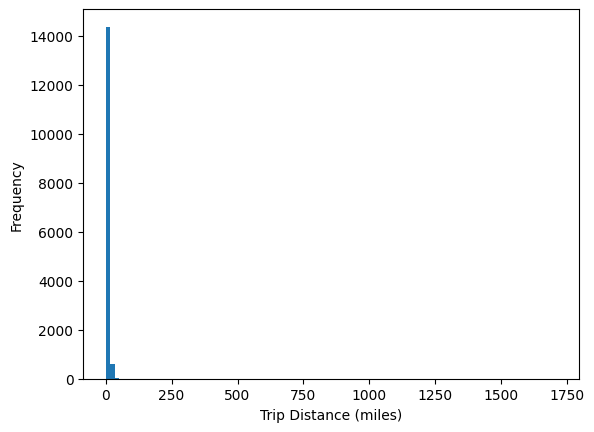

In [72]:
df_dist = df['trip_miles']
plt.hist(df_dist.values, bins=100)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
# plt.savefig('2c_2.png')
plt.show()
plt.close()

This histogram shows that most of the trips are of short distance.

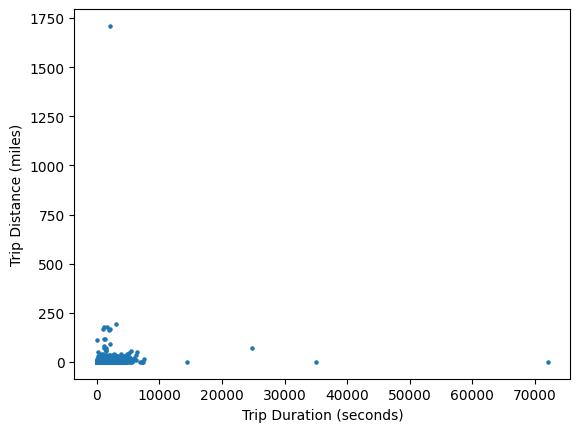

In [73]:
# 2.c (b)

plt.scatter(df_times, df_dist, s=5)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Distance (miles)')
# plt.savefig('2c_3.png')
plt.show()
plt.close()

The scatter plot shows that there are a few glaring outliers in trip distance and trip duration. During route planning, one would want to avoid both the long distance and large duration paths.

Overall, there is some correlation in the values.

### 2.d Seasonal Trends in Taxi Usage and Distance

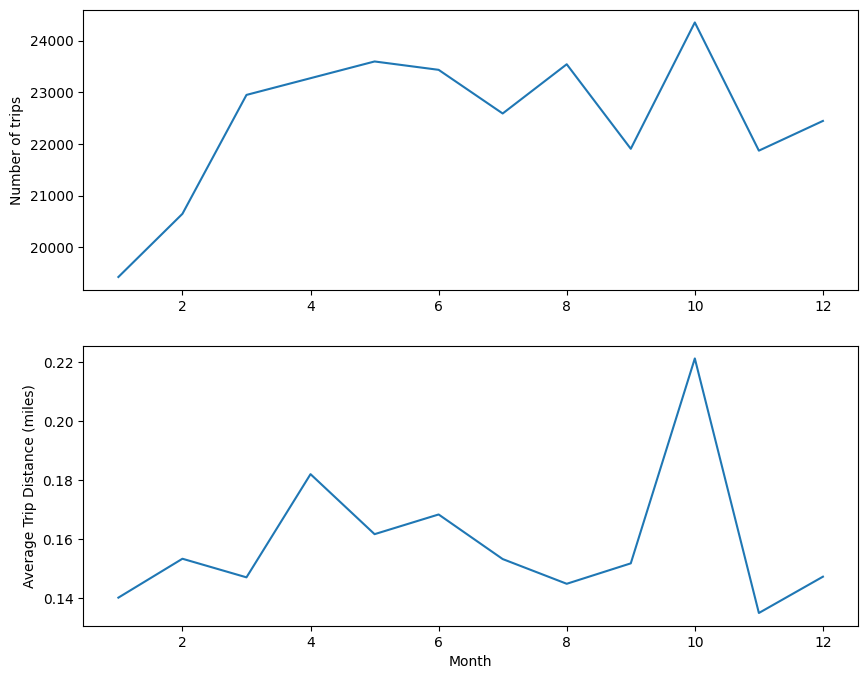

In [74]:
groups = df.groupby('trip_start_month')

months = [i for i in range(1, 13)]
number = [groups.get_group(i).size for i in range(1, 13)]
distance = [groups.get_group(i)['trip_miles'].sum()/number[i-1] for i in range(1, 13)]

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(months, number)
plt.ylabel('Number of trips')
plt.subplot(2, 1, 2)
plt.plot(months, distance)
plt.xlabel('Month')
plt.ylabel('Average Trip Distance (miles)')
# plt.savefig('2d_1.png')
plt.show()
plt.close()


The number of trips is highest in month 10 and the lowest in month 1.
The average trip distance is the highest i month 10 and the lowest in month 11.

#### Interpretation
Using these trends, we can allocate more resources for high demand periods and less resources for low demand periods.

### 2.e Distance vs. Time of Day

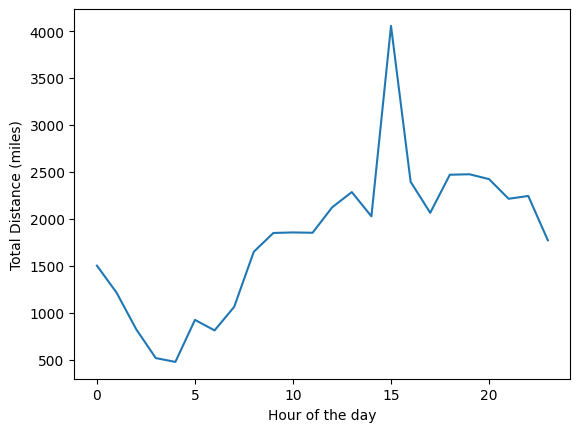

In [75]:
groups = df.groupby('trip_start_hour')

hours = [i for i in range(0, 24)]
distance = [groups.get_group(i)['trip_miles'].sum() for i in range(0, 24)]

plt.plot(hours, distance)
plt.xlabel('Hour of the day')
plt.ylabel('Total Distance (miles)')
# plt.savefig('2e_1.png')
plt.show()
plt.close()


In general, the distance travelled during the peak hours (18-21) is larger than during non-peak hours. Hour 15 is an outlier due to some trips of long distance starting in this hour. The distance travelled is least in the hours with low demand (around hour 5).